What is Analysis of Variance (ANOVA)?
* Analysis of variance, or ANOVA, which is the statistical method used for comparing means across three or more groups. 
* Like the t-test, ANOVA has underlying assumptions to be met, and there are alternative methods to use when the assumptions are not met.

How ANOVA is similar to chi-squared?
* Similar to chi-squared, ANOVA is an omnibus test, which means a significant result indicates there is a difference between the means, but it is not useful in determining which means are different from each other.”

What do we use instead of standardized residuals like we had done in Chi-squared test?
* ANOVA uses planned contrasts and post hoc tests to determine which means are statistically significantly different from one another. 

What are reported as effect size for ANOVA?
* Instead of Cramér’s V or odds ratios for chi-squared and Cohen’s d for t-tests, η2 and ω2 are often reported as effect sizes for ANOVA.

################################CHAPTER OUTCOMES########################

Achievement 1: Exploring the data using graphics and descriptive statistics
Achievement 2: Understanding and conducting one-way ANOVA
Achievement 3: Choosing and using post hoc tests and contrasts
Achievement 4: Computing and interpreting effect sizes for ANOVA
Achievement 5: Testing ANOVA assumptions
Achievement 6: Choosing and using alternative tests when ANOVA assumptions are not met
Achievement 7: Understanding and conducting two-way ANOVA

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
gss_2018 = pd.read_csv('gss.2018.csv')

In [12]:
gss_2018.head()

,Unnamed: 0,YEAR,BALLOT,USETECH,HAPPY,PARTYID,RINCOME,RACE,SEX,DEGREE,EDUC,AGE,MARITAL,HRS2,HRS1,WRKSTAT,ID_,UNHAPPY
0,1,2018,1,100.0,2,5,13,1,1,2,14,43,5,41,-1,3,1,0
1,2,2018,3,-1.0,1,2,0,1,2,1,10,74,4,-1,-1,5,2,1
2,3,2018,2,100.0,1,4,12,1,1,3,16,42,1,-1,40,1,3,0
3,4,2018,2,70.0,1,2,12,1,2,3,16,63,1,-1,40,1,4,2
4,5,2018,3,-1.0,2,6,0,2,1,4,18,71,3,-1,-1,5,5,1


In [13]:
gss_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2345 non-null   int64  
 1   YEAR        2345 non-null   int64  
 2   BALLOT      2345 non-null   int64  
 3   USETECH     2345 non-null   float64
 4   HAPPY       2345 non-null   int64  
 5   PARTYID     2345 non-null   int64  
 6   RINCOME     2345 non-null   int64  
 7   RACE        2345 non-null   int64  
 8   SEX         2345 non-null   int64  
 9   DEGREE      2345 non-null   int64  
 10  EDUC        2345 non-null   int64  
 11  AGE         2345 non-null   int64  
 12  MARITAL     2345 non-null   int64  
 13  HRS2        2345 non-null   int64  
 14  HRS1        2345 non-null   int64  
 15  WRKSTAT     2345 non-null   int64  
 16  ID_         2345 non-null   int64  
 17  UNHAPPY     2345 non-null   int64  
dtypes: float64(1), int64(17)
memory usage: 329.9 KB


In [14]:

# Recode USETECH to valid range
gss_2018_cleaned = gss_2018.replace([-1, 998, 999], [None, None, None])

# Print the cleaned DataFrame
print(gss_2018_cleaned.head())


  Unnamed: 0  YEAR BALLOT USETECH HAPPY PARTYID RINCOME RACE SEX DEGREE EDUC  \
0          1  2018      1   100.0     2       5      13    1   1      2   14   
1          2  2018      3    None     1       2       0    1   2      1   10   
2          3  2018      2   100.0     1       4      12    1   1      3   16   
3          4  2018      2    70.0     1       2      12    1   2      3   16   
4          5  2018      3    None     2       6       0    2   1      4   18   

  AGE MARITAL  HRS2  HRS1 WRKSTAT ID_ UNHAPPY  
0  43       5    41  None       3   1       0  
1  74       4  None  None       5   2       1  
2  42       1  None    40       1   3       0  
3  63       1  None    40       1   4       2  
4  71       3  None  None       5   5       1  


In [16]:

# Selecting relevant columns
gss_2018_cleaned = gss_2018[['HAPPY', 'SEX', 'DEGREE', 'USETECH', 'AGE']]

# Recode USETECH and AGE to valid ranges
gss_2018_cleaned['USETECH'] = gss_2018_cleaned['USETECH'].replace([-1, 998, 999], [None, None, None])
gss_2018_cleaned['AGE'] = gss_2018_cleaned['AGE'].replace([98, 99], [None, None])

# Print the cleaned DataFrame
print(gss_2018_cleaned.head())


   HAPPY  SEX  DEGREE USETECH AGE
0      2    1       2   100.0  43
1      1    2       1    None  74
2      1    1       3   100.0  42
3      1    2       3    70.0  63
4      2    1       4    None  71


C:\Users\Arian\AppData\Local\Temp\ipykernel_12856\2377092817.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gss_2018_cleaned['USETECH'] = gss_2018_cleaned['USETECH'].replace([-1, 998, 999], [None, None, None])
C:\Users\Arian\AppData\Local\Temp\ipykernel_12856\2377092817.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gss_2018_cleaned['AGE'] = gss_2018_cleaned['AGE'].replace([98, 99], [None, None])


In [17]:

# Selecting relevant columns
gss_2018_cleaned = gss_2018[['HAPPY', 'SEX', 'DEGREE', 'USETECH', 'AGE']]

# Recode USETECH, AGE, DEGREE, and HAPPY to valid ranges
gss_2018_cleaned['USETECH'] = gss_2018_cleaned['USETECH'].replace([-1, 998, 999], [None, None, None])
gss_2018_cleaned['AGE'] = gss_2018_cleaned['AGE'].replace([98, 99], [None, None])
gss_2018_cleaned['DEGREE'] = gss_2018_cleaned['DEGREE'].replace([8, 9], [None, None])
gss_2018_cleaned['HAPPY'] = gss_2018_cleaned['HAPPY'].replace([8, 9, 0], [None, None, None])

# Print the cleaned DataFrame
print(gss_2018_cleaned.head())


  HAPPY  SEX  DEGREE USETECH AGE
0     2    1       2   100.0  43
1     1    2       1    None  74
2     1    1       3   100.0  42
3     1    2       3    70.0  63
4     2    1       4    None  71


C:\Users\Arian\AppData\Local\Temp\ipykernel_12856\3409242264.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gss_2018_cleaned['USETECH'] = gss_2018_cleaned['USETECH'].replace([-1, 998, 999], [None, None, None])
C:\Users\Arian\AppData\Local\Temp\ipykernel_12856\3409242264.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gss_2018_cleaned['AGE'] = gss_2018_cleaned['AGE'].replace([98, 99], [None, None])
C:\Users\Arian\AppData\Local\Temp\ipykernel_12856\3409242264.py:7: SettingWithCopyWarning: 
A value is

In [18]:
# Selecting relevant columns
gss_2018_cleaned = gss_2018[['HAPPY', 'SEX', 'DEGREE', 'USETECH', 'AGE']]

# Recode variables to valid ranges
gss_2018_cleaned['USETECH'] = gss_2018_cleaned['USETECH'].replace([-1, 999, 998], [None, None, None])
gss_2018_cleaned['AGE'] = gss_2018_cleaned['AGE'].replace([98, 99], [None, None])
gss_2018_cleaned['DEGREE'] = gss_2018_cleaned['DEGREE'].replace([8, 9], [None, None])
gss_2018_cleaned['HAPPY'] = gss_2018_cleaned['HAPPY'].replace([8, 9, 0], [None, None, None])

# Recode SEX, DEGREE, and HAPPY as factors with desired labels
gss_2018_cleaned['SEX'] = pd.Categorical(gss_2018_cleaned['SEX'], categories=[1, 2], ordered=False)
gss_2018_cleaned['SEX'] = gss_2018_cleaned['SEX'].replace([1, 2], ['male', 'female'])

degree_labels = ["< high school", "high school", "junior college", "bachelor", "graduate"]
gss_2018_cleaned['DEGREE'] = pd.Categorical(gss_2018_cleaned['DEGREE'], categories=[1, 2, 3, 4, 5], ordered=False)
gss_2018_cleaned['DEGREE'] = gss_2018_cleaned['DEGREE'].replace([1, 2, 3, 4, 5], degree_labels)

happy_labels = ["very happy", "pretty happy", "not too happy"]
gss_2018_cleaned['HAPPY'] = pd.Categorical(gss_2018_cleaned['HAPPY'], categories=[1, 2, 3], ordered=False)
gss_2018_cleaned['HAPPY'] = gss_2018_cleaned['HAPPY'].replace([1, 2, 3], happy_labels)

# Print the cleaned DataFrame
print(gss_2018_cleaned.head())

          HAPPY     SEX          DEGREE USETECH AGE
0  pretty happy    male     high school   100.0  43
1    very happy  female   < high school    None  74
2    very happy    male  junior college   100.0  42
3    very happy  female  junior college    70.0  63
4  pretty happy    male        bachelor    None  71


C:\Users\Arian\AppData\Local\Temp\ipykernel_12856\2504762646.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gss_2018_cleaned['USETECH'] = gss_2018_cleaned['USETECH'].replace([-1, 999, 998], [None, None, None])
C:\Users\Arian\AppData\Local\Temp\ipykernel_12856\2504762646.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gss_2018_cleaned['AGE'] = gss_2018_cleaned['AGE'].replace([98, 99], [None, None])
C:\Users\Arian\AppData\Local\Temp\ipykernel_12856\2504762646.py:7: SettingWithCopyWarning: 
A value is

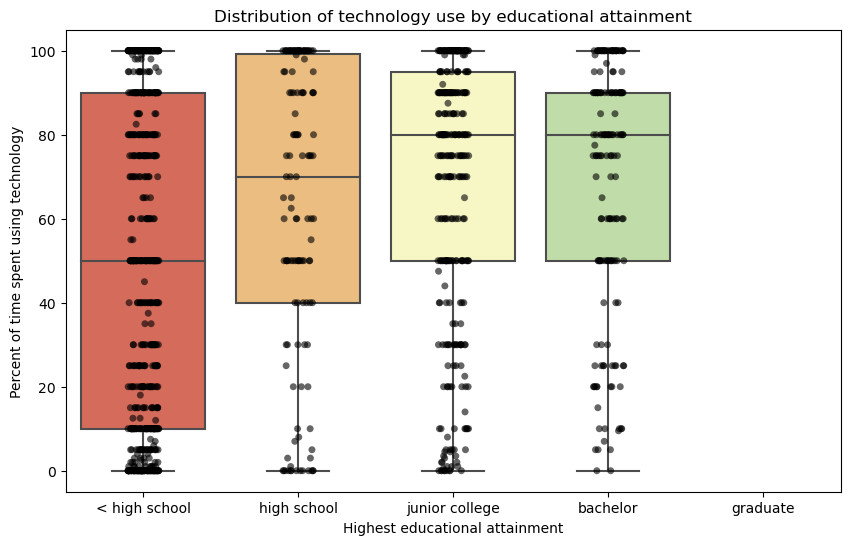

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns


# Drop rows with missing values in the USETECH column
gss_2018_cleaned_dropna = gss_2018_cleaned.dropna(subset=['USETECH'])

# Create the plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='DEGREE', y='USETECH', data=gss_2018_cleaned_dropna, palette='Spectral')
sns.stripplot(x='DEGREE', y='USETECH', data=gss_2018_cleaned_dropna, color='k', alpha=0.6, jitter=True)

# Set the labels and title
plt.xlabel('Highest educational attainment')
plt.ylabel('Percent of time spent using technology')
plt.title('Distribution of technology use by educational attainment')

# Show the plot
plt.show()


Interpretation:
* A lot of people in the first two categories had selected 0% of their     time at work is spent using technology. 
* For all but the first category, there were a lot of people who selected   100% of their time at work is spent using technology. 
* How these observations might influence the results. 
* There are terms for measures where people are at the very top or very    bottom of the range. 
* When there are a lot of observations at the very bottom of a range,      this is called a floor effect, while a lot of observations at the top    of a range is called a ceiling effect.

CAN STILL ANOVA BE USED (if there are floor and ceiling effect)?
* Yes, but with caution. 
* This often means that the variation in a measure is limited by its       range. 
* Since ANOVA is an analysis of variance, which examines central tendency   and variation together, the limitations of floor and ceiling effects     can result in not finding differences when there are differences.

What are the common reasons for ceiling and floor effects?
* One common reason for ceiling and floor effects is when the underlying   measure has a wider range than what is measured. 
* In the case of technology use, the range of 0% to 100% of the time is    as wide as it can be, so the observations at the ceiling and floor of    this measure are just reflecting very low and very high levels of        technology use at work among many of the people in the sample.


###############Understanding and Conducting One-way ANOVA################

* The t-tests were great for comparing two means.

Can we just use the t-tests to compare all the means for the five DEGREE variable group i.e. we could just do a t-test for each pair of means? This would result in t-tests to compare mean tech use for those with less than high school to high school, less than high school to junior college, and so on.

NOT A GREAT IDEA!!!

Reason:
* Conducting multiple tests on the same variables is not a great idea      given that each statistical test comes with some probability that what   is going on in the sample is not a good representation of what is        happening in the population.
* For example, with the first independent-samples t-test from the prior    chapter, the probability that the two group means were the same in the   populations the samples came from was very small, but it was not zero    (see Chapter 6). 
* If the threshold for the p-value to indicate statistical significance    is .05, there can be up to a 5% probability that rejecting the null      hypothesis is an error. 
* Rejecting the null hypothesis when it is true is called a Type I error 


What are Type I and Type II error?
* Type I error, also called α (alpha), is rejecting the null hypothesis    when in reality the null hypothesis is true (there is no relationship    but study detects one).
* Type II error, also called β (beta) is failing to reject the null        hypothesis when in    reality the null hypothesis is false (there is a   relationship but study   did not detect it). 
* If α is .05, this is a willingness to risk a 5% chance of making a Type   I error of rejecting the null hypothesis when it should be retained.   
* Increasing sample size and decreasing the threshold for statistical      significance (α) can aid in decreasing Type I and II errors.
* Type I and II errors are related to the concept of statistical power. 
* The power of a statistical test is the probability that the results of   the test are not a Type II error.
* Power is the probability of finding a relationship when there is a       relationship.

For our example, 
* With five groups in the degree variable, comparing each pair with a      t-test (i.e., conducting pairwise comparisons) would result in 10        t-tests. 
* If each t-test had a p-value threshold of .05 for statistical            significance, the probability of at least one Type I error is fairly     high. 

The formula for this probability of a Type I error when there are multiple comparisons is shown below:
          αf=1−(1−αi)^c
                    where 
                          αf is the familywise Type I error rate, 
                          αi is the individual alpha set as the                                           statistical significance threshold, 
                          and 
                          c is the number of comparisons. 
                
The formula for computing c is (k(k−1))/2 , where k is the total number of groups.

For a five-group DEGREE variable with α = .05 for each pairwise comparison, the familywise αf would be the .40 computed as below:
          αf=1−(1−.05)^10=.40

With 10 pairwise comparisons, the familywise αf indicated there would be a 40% probability of making a Type I error. 


HOW CAN WE CONTROL THIS ERROR RATE?
* To control this error rate, and for efficiency, use a single ANOVA test   instead of 10 t-tests. 
* ANOVA is useful for testing whether three or more means are equal. 
* It can be used with two means, but the t-test is preferable because it   is more straightforward.


The F test statistic for ANOVA:

* To compare mean technology use time across the five degree categories,   oneway.test() is one of the ANOVA functions in R. 
* The oneway.test() function is in the stats library that loads with base   R, so there are no new packages to install and load. 
* The oneway.test() function has several arguments. 
* The first argument is formula =, where the formula for testing would be   entered. 
* The formula for oneway.test() places the continuous variable first,      then the tilde, then the categorical variable. 
* The formula would be continuous ~ categorical. In this case, with the    USETECH and DEGREE variables, the formula is USETECH ~ DEGREE.
* After the formula, the data frame name is entered for the data =         argument, and the final argument is var.equal =, which refers to one of   the assumptions of ANOVA.

In [21]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols


# Convert USETECH to numeric
gss_2018_cleaned['USETECH'] = pd.to_numeric(gss_2018_cleaned['USETECH'], errors='coerce')

# Perform one-way ANOVA
model = ols('USETECH ~ DEGREE', data=gss_2018_cleaned).fit()
anova_table = sm.stats.anova_lm(model)

# Print the ANOVA table
print(anova_table)


              df        sum_sq       mean_sq          F        PR(>F)
DEGREE       4.0  1.010150e+05  25253.752307  19.812121  7.667478e-16
Residual  1285.0  1.637940e+06   1274.661733        NaN           NaN


C:\Users\Arian\AppData\Local\Temp\ipykernel_12856\1991079154.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gss_2018_cleaned['USETECH'] = pd.to_numeric(gss_2018_cleaned['USETECH'], errors='coerce')
